In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.draw import polygon


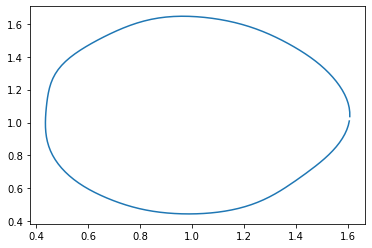

In [5]:
from numpy.random import default_rng
rng = default_rng()

def generate_wavy_circle_contour(x0,y0,radius,amplitude,smoothness,length):
    """Generate a wavy circle contour"""
    t = np.linspace(0,2*math.pi,length).reshape((length,1))    
    f = np.exp(-smoothness*length*np.abs(np.fft.fftfreq(length))).reshape((length,1))
    circle = radius * np.cos(t) + 1j * radius * np.sin(t)    
    s = circle + x0 + 1j * y0    
    s = s + amplitude * rng.normal(0,0.1,size=(length,1)) * circle
    s = np.fft.ifftn(f*np.fft.fftn(s))
    return np.real(s),np.imag(s)

x, y = generate_wavy_circle_contour(1,1,1,3,0.5,128)
plt.plot(x,y)


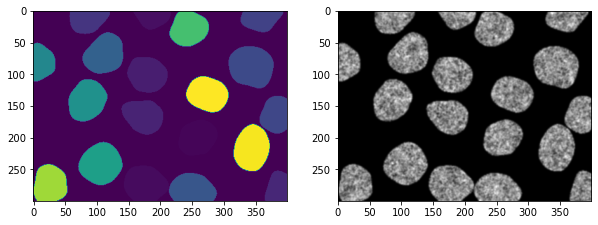

In [15]:
from skimage.filters import gaussian
labels = np.zeros((300,400))
for k in range(100):
    x0 = labels.shape[1] * rng.uniform()
    y0 = labels.shape[0] * rng.uniform()
    x, y = generate_wavy_circle_contour(x0,y0,50,5,0.5,64)
    rr,cc = polygon(y.ravel(),x.ravel(),labels.shape)
    if np.all(labels[rr,cc]==0):
        labels[rr,cc] = k+1

fx,fy = np.meshgrid(np.fft.fftfreq(labels.shape[1]),np.fft.fftfreq(labels.shape[0]))

g = 1/(1+10*np.sqrt((np.power(fx,2)+np.power(fy,2))))
texture = np.real(np.fft.ifftn(g*np.fft.fftn(rng.normal(size=labels.shape))))
texture = (texture - texture.min()) / (texture.max()-texture.min())
texture = np.fmax(texture - 0.2, 0)
im = gaussian((labels>0) * texture, 1)

fix,ax = plt.subplots(1,2,figsize=[10,20])
ax[0].imshow(labels)
ax[1].imshow(im,cmap='gray')
#plt.imsave("/home/jeromeb/Desktop/nuk.png",im,cmap="gray")



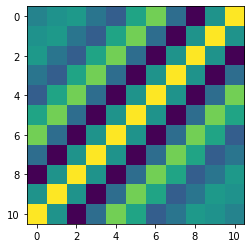